1 розділ - статистична модель

Рівноважна кількість безкоштовних користувачів:  2479.99
Рівноважна кількість преміум користувачів:  122.99
Рівноважна ціна преміум версії:  51.39
Максимальний прибуток:  5049.59
Похідна прибутку: -7.12e-07


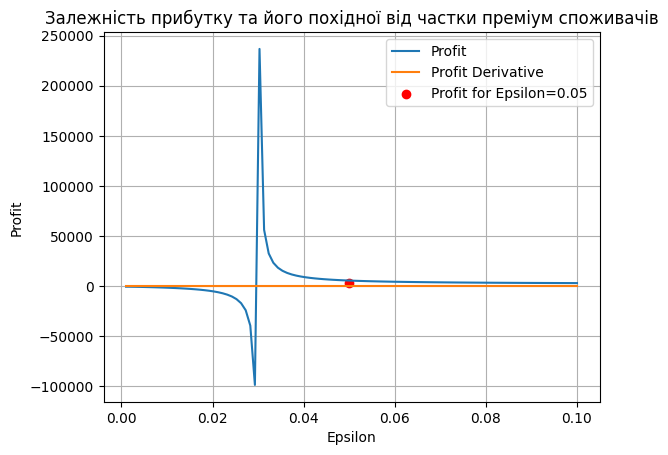

Частка преміум споживачів:  0.04


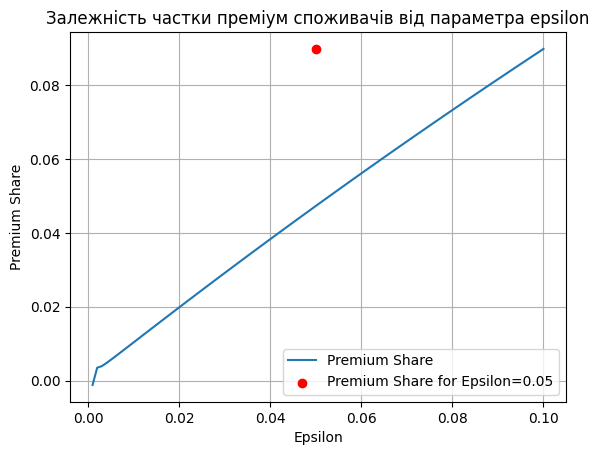

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_profit(a, b, c, f, FC, v1, v2, epsilon):
    # Розрахунок рівноважних кількостей споживачів
    if epsilon != 0:
        q1 = 1 / epsilon * ((a * epsilon + b * f) - (v1 + epsilon * v2)) / (2 * (epsilon * c - b)) + f / epsilon
        q2 = ((a * epsilon + b * f) - (v1 + epsilon * v2)) / (2 * (epsilon * c - b))
    else:
        q1 = q2 = np.inf

    # Розрахунок рівноважної ціни
    if epsilon != 0:
        p2 = (a * epsilon + b * f + v1 + epsilon * v2) / (2 * epsilon)
    else:
        p2 = 0

    # Розрахунок прибутку
    if epsilon != 0:
        profit = ((a * epsilon + b * f) - (v1 + epsilon * v2)) ** 2 / (4 * epsilon * (epsilon * c - b)) - FC - v1 * f / epsilon
    else:
        profit = -np.inf

    return q1, q2, p2, profit

def calculate_profit_derivative(a, b, c, f, v1, v2, epsilon):
    if epsilon != 0:
        A = a - v2
        B = b * f - v1
        alpha = -A ** 2 * b - 2 * A * B * c + 4 * v1 * f * c ** 2
        beta = -8 * b * v1 * f * c - 2 * B ** 2 * c
        gamma = b * B ** 2 + 4 * b ** 2 * v1 * f
        D = beta ** 2 - 4 * alpha * gamma

        epsilon_1 = (-beta - np.sqrt(D)) / (2 * alpha)
        epsilon_2 = (-beta + np.sqrt(D)) / (2 * alpha)

        derivative = alpha * (epsilon - epsilon_1) * (epsilon - epsilon_2) * epsilon ** 2 * (epsilon * c - b) ** 2
    else:
        derivative = np.inf

    return derivative

# Вхідні параметри
a = 100
b = 0.03
c = 1
f = 1
FC = 1000
v1 = 0.1
v2 = 0.2
epsilon = 0.05

# Розрахунок прибутку та його похідної для epsilon = 0.05
q1, q2, p2, profit = calculate_profit(a, b, c, f, FC, v1, v2, epsilon)
derivative = calculate_profit_derivative(a, b, c, f, v1, v2, epsilon)

# Виведення результатів
print("Рівноважна кількість безкоштовних користувачів: ", "{:.2f}".format(round(q1 - 0.005, 2)))
print("Рівноважна кількість преміум користувачів: ", "{:.2f}".format(round(q2 - 0.005, 2)))
print("Рівноважна ціна преміум версії: ", "{:.2f}".format(round(p2 - 0.005, 2)))
print("Максимальний прибуток: ", "{:.2f}".format(round(profit - 0.005, 2)))
print("Похідна прибутку:", "{:.2e}".format(derivative))

# Побудова графіка
epsilon_vals = np.linspace(0, 0.1, 100)
profits = []
derivatives = []
for e in epsilon_vals:
    _, _, _, profit = calculate_profit(a, b, c, f, FC, v1, v2, e)
    derivative =calculate_profit_derivative(a, b, c, f, v1, v2, e)
    profits.append(profit)
    derivatives.append(derivative)

plt.plot(epsilon_vals, profits, label='Profit')
plt.plot(epsilon_vals, derivatives, label='Profit Derivative')
plt.scatter(epsilon, profit, color='red', label='Profit for Epsilon=0.05')
plt.xlabel('Еpsilon')
plt.ylabel('Profit')
plt.title('Залежність прибутку та його похідної від частки преміум споживачів')
plt.legend()
plt.grid(True)
plt.show()


def calculate_premium_share(q1, q2):
    # Розрахунок частки преміум споживачів
    premium_share = q2 / (q1 + q2)
    return premium_share

# Розрахунок частки преміум споживачів для epsilon = 0.05
premium_share = calculate_premium_share(q1, q2)

# Виведення результату
print("Частка преміум споживачів: ", "{:.2f}".format(round(premium_share - 0.005, 2)))

# Побудова графіка
premium_shares = []
for e in epsilon_vals:
    q1, q2, _, _ = calculate_profit(a, b, c, f, FC, v1, v2, e)
    premium_share = calculate_premium_share(q1, q2)
    premium_shares.append(premium_share)

plt.plot(epsilon_vals, premium_shares, label='Premium Share')
plt.scatter(epsilon, premium_share, color='red', label='Premium Share for Epsilon=0.05')
plt.xlabel('Еpsilon')
plt.ylabel('Premium Share')
plt.title('Залежність частки преміум споживачів від параметра epsilon')
plt.legend()
plt.grid(True)
plt.show()



1 розділ - динамічна модель часу

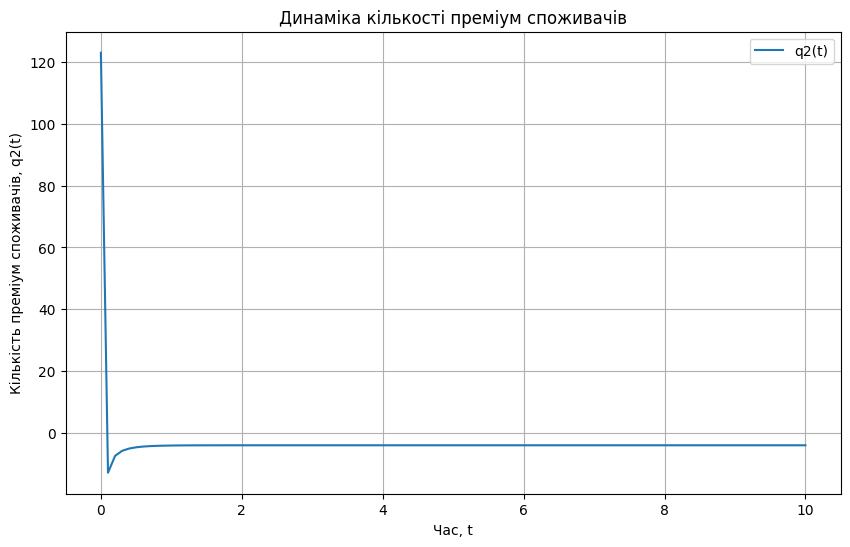

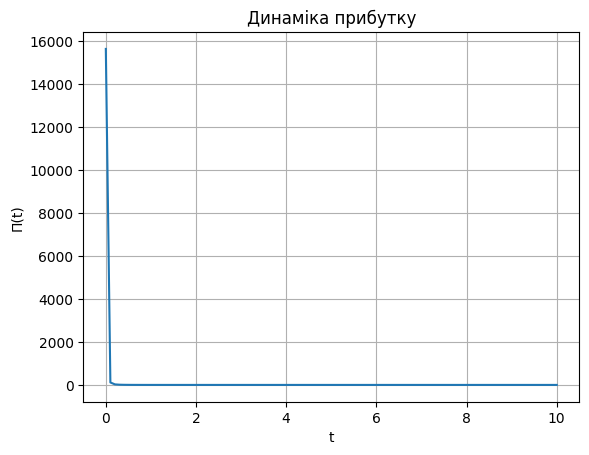

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення констант
M1 = 1
M2 = 4
M0 = 0
D = M2**2 - 4*M1*M0
q2_I = (-M2 + np.sqrt(D)) / (2*M1)
q2_II = (-M2 - np.sqrt(D)) / (2*M1)
N1 = 1 / (q2_I - q2_II)
q2_0 = 123
c = np.log((q2_0 - q2_I) / (q2_0 - q2_II))

# Визначення функції П
def П(q2):
    return M1 * q2**2 + M2 * q2 + M0

# Функція для обчислення q2(t)
def q2(t):
    if abs((q2_0 - q2_I) / (q2_0 - q2_II)) > 0:
        return q2_II + (q2_II - q2_I) / (np.exp(c) * np.exp(M1/N1*t) - 1)
    else:
        return q2_II + (q2_II - q2_I) / (np.exp(c) * np.exp(M1/N1*t) + 1)

# Визначення часового діапазону
t_values = np.linspace(0, 10, 100)

# Обчислення q2(t) для кожного значення часу
q2_values = [q2(t) for t in t_values]

# Побудова графіку
plt.figure(figsize=(10, 6))
plt.plot(t_values, q2_values, label='q2(t)')
plt.xlabel('Час, t')
plt.ylabel('Кількість преміум споживачів, q2(t)')
plt.title('Динаміка кількості преміум споживачів')
plt.legend()
plt.grid(True)
plt.show()

# Генерація даних для графіку прибутку
П_values = [П(q2) for q2 in q2_values]

# Побудова графіку прибутку
plt.figure()
plt.plot(t_values, П_values)
plt.xlabel('t')
plt.ylabel('П(t)')
plt.title('Динаміка прибутку')
plt.grid(True)
plt.show()


2 розділ - дискретна модель

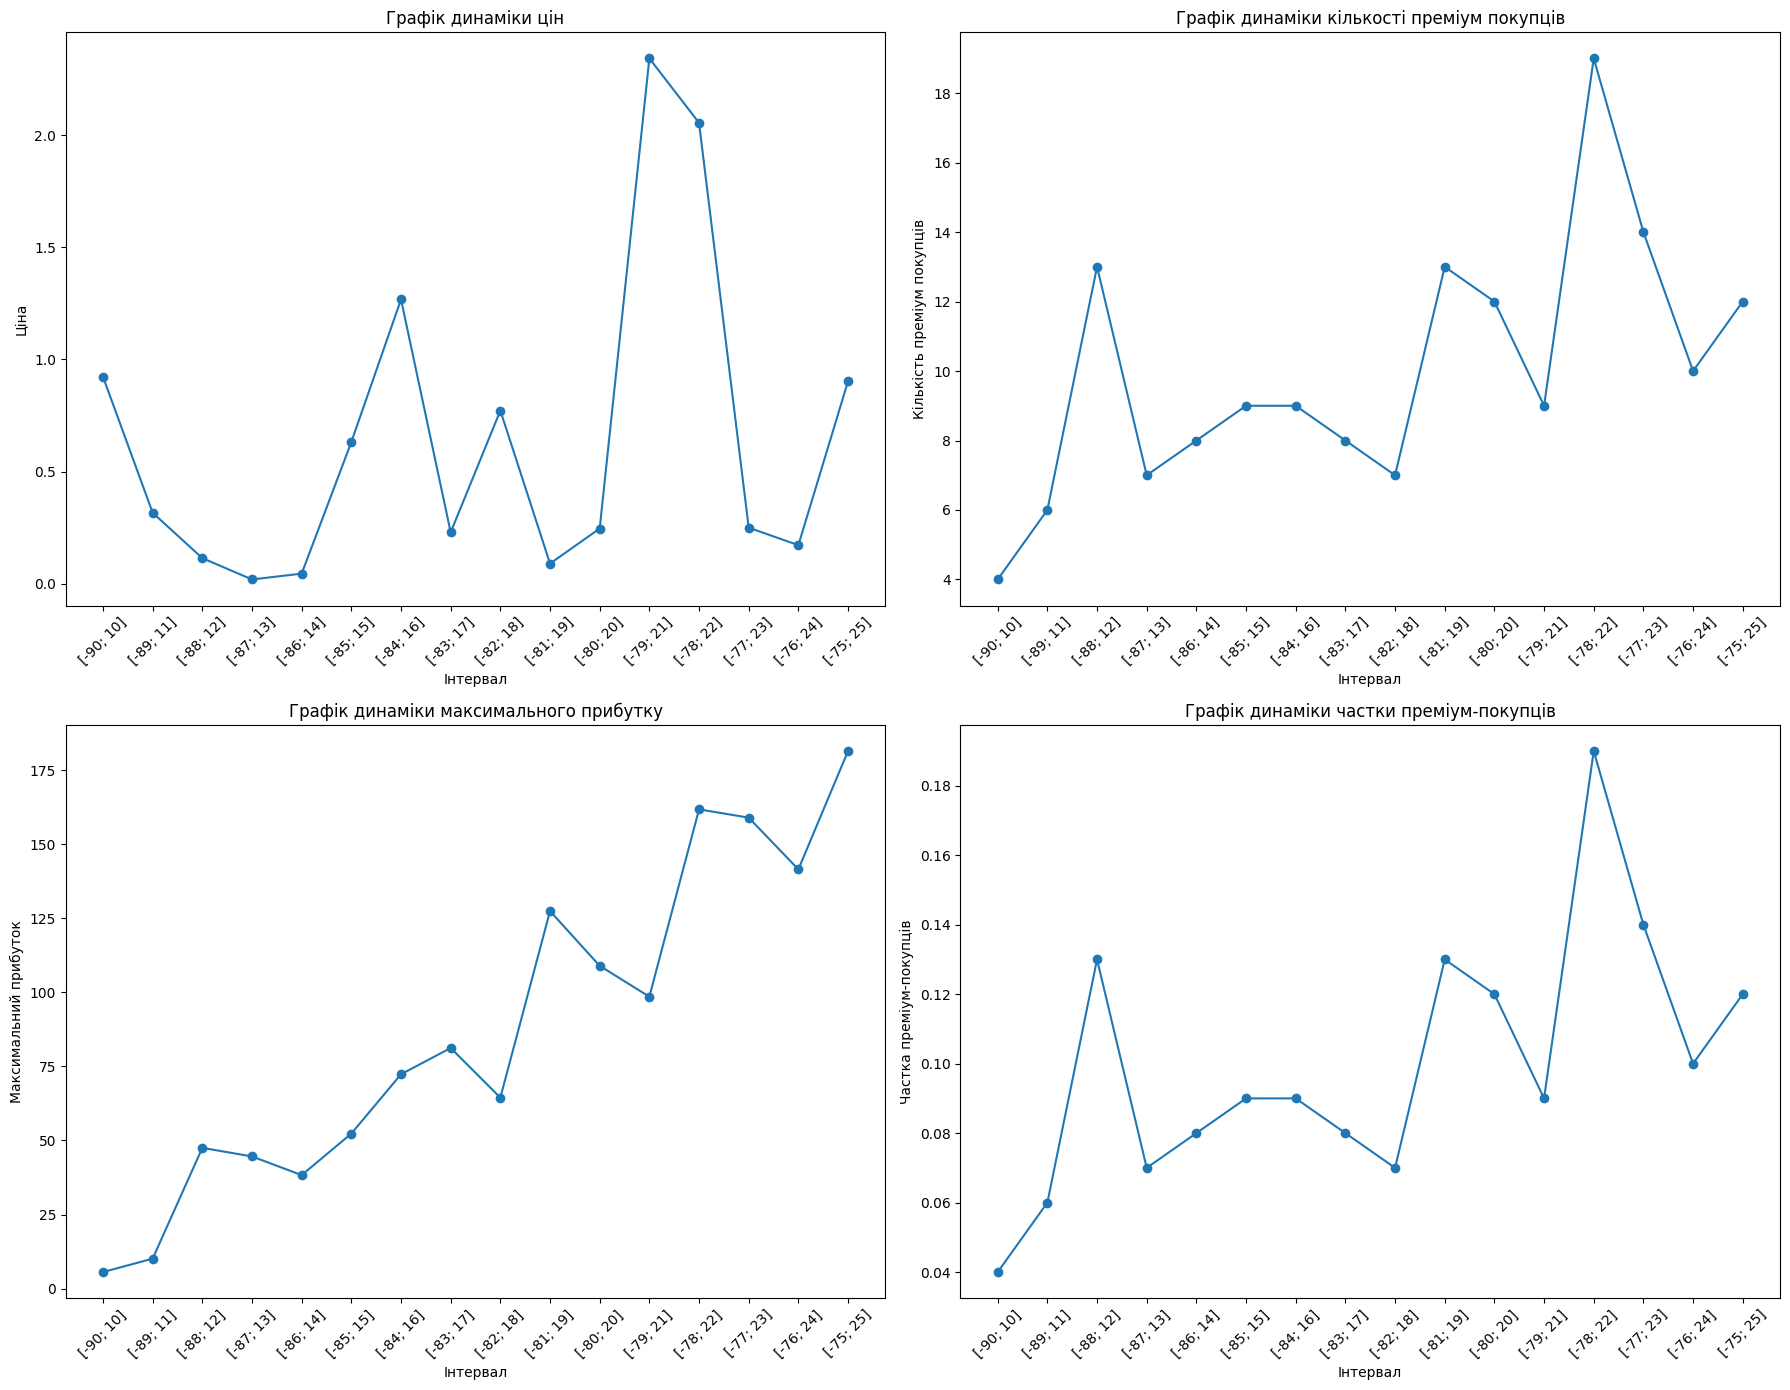

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

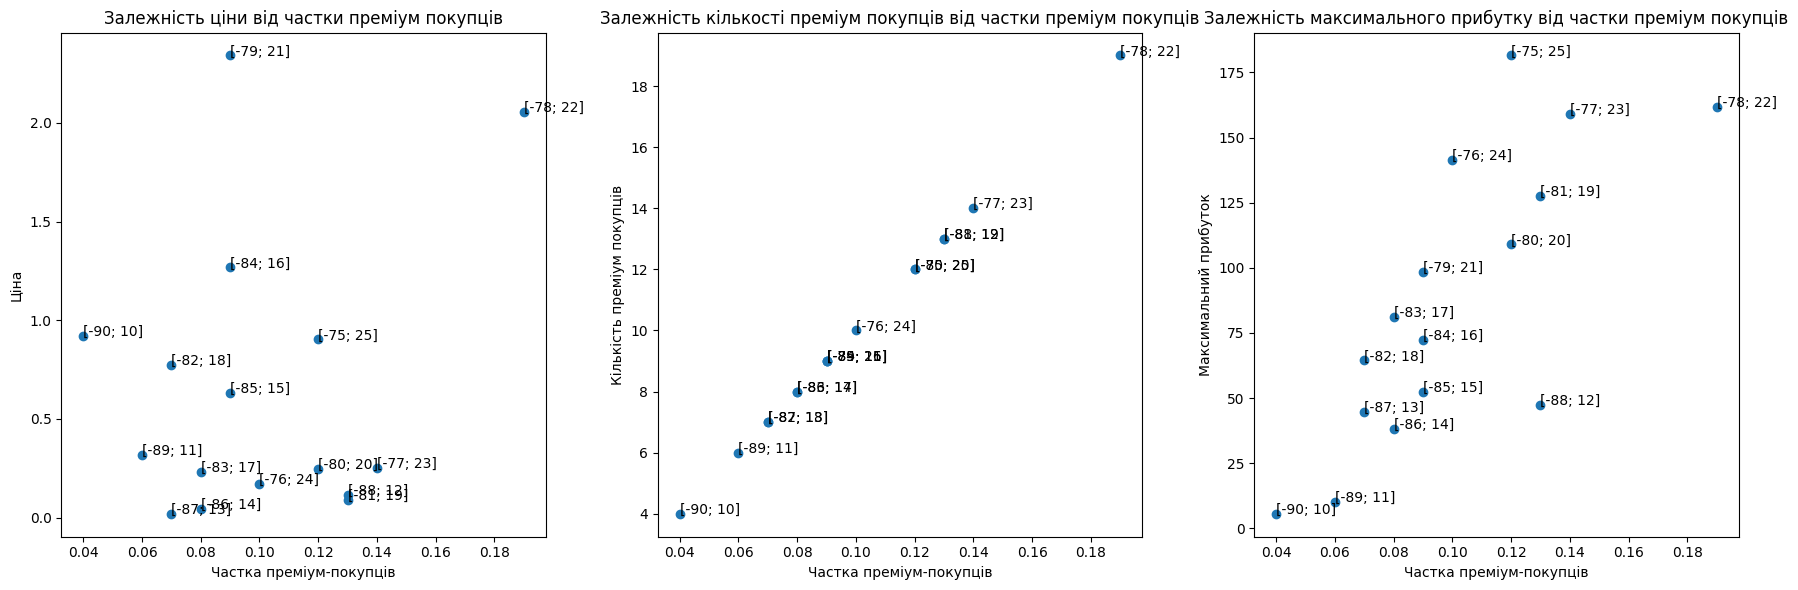

Глобальний максимальний прибуток: 181.52938758145365
Глобальний інтервал для максимального прибутку: [-75; 25]
Ціна для глобального максимального прибутку: 0.9026283623961291
Кількість преміум покупців для глобального максимального прибутку: 12.0
Частка преміум-покупців для глобального максимального прибутку: 0.12


Saving general.xlsx to general.xlsx
Усі значення з файлу:
     Interval  Mean Price  Price standard deviation  Mean Premium Customers  \
0   [-90; 10]    0.961956                  0.827521                    6.10   
1   [-89; 11]    0.855153                  0.894915                    6.56   
2   [-88; 12]    1.062998                  0.928786                    7.36   
3   [-87; 13]    0.936386                  0.943625                    7.40   
4   [-86; 14]    0.871538                  0.730489                    7.54   
5   [-85; 15]    0.835305                  0.842175                    8.66   
6   [-84; 16]    1.048611                  1.030346                    9.50   
7   [-83; 17]    0.939237                  0.925499                    9.80   
8   [-82; 18]    0.960434                  0.870996                   10.02   
9   [-81; 19]    0.961316                  0.814313                   10.80   
10  [-80; 20]    0.982627                  0.860654                   10.

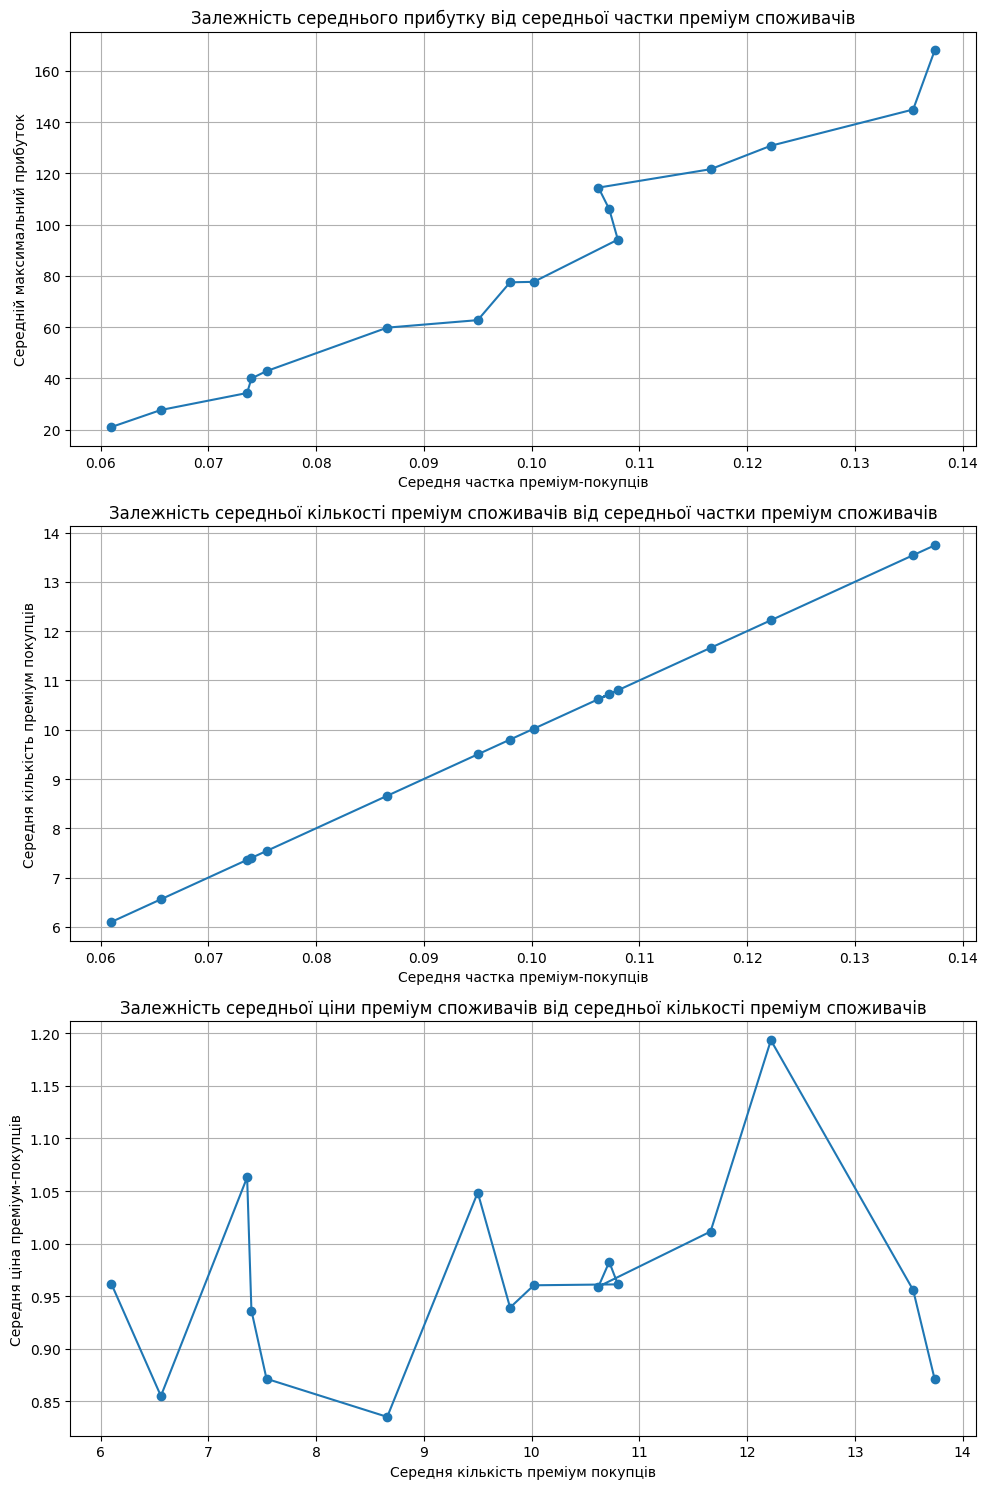

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# Глобальні змінні
num_intervals = 16
V_min_global = -90
V_max_global = 10
c1 = 0.1  # Параметри визначення прибутку
c2 = 0.4   # Параметри визначення прибутку

# Функція для обчислення прибутку
def calculate_profit(V, q):
    return (V - c2) * q - c1 * (100 - q)

# Ініціалізація векторів
prices_vector = np.zeros(num_intervals)
premium_customers_vector = np.zeros(num_intervals)
profits_vector = np.zeros(num_intervals)
premium_ratio_vector = np.zeros(num_intervals)

# Глобальний цикл For
for i in range(num_intervals):
    V_min = V_min_global + i
    V_max = V_max_global + i

    # Цикл For-1
    V = np.random.uniform(V_min, V_max, 100)
    V_sorted = np.sort(V)
    V_positive = V_sorted[V_sorted > 0]

    # Вектор цін
    prices_vector[i] = V_positive[0]

    # Цикл For-2
    profits = []
    premium_customers = []  # Зберігатиме кількість преміум покупців для кожного V
    for v in V_positive:
        q = len(V_positive) - np.searchsorted(V_positive, v)
        premium_customers.append(q)
        profits.append(calculate_profit(v, q))

    # Завершення циклу For-2
    max_profit_index = np.argmax(profits)
    profits_vector[i] = profits[max_profit_index]
    premium_customers_vector[i] = premium_customers[max_profit_index]
    premium_ratio_vector[i] = premium_customers[max_profit_index] / 100

# Крок 2. Побудова графіків
intervals = [f"[{V_min_global + i}; {V_max_global + i}]" for i in range(num_intervals)]

plt.figure(figsize=(18, 14))

# Графік динаміки цін
plt.subplot(2, 2, 1)
plt.plot(intervals, prices_vector, marker='o')
plt.title('Графік динаміки цін')
plt.xlabel('Інтервал')
plt.ylabel('Ціна')
plt.xticks(rotation=45)  # Повертаємо підписи по осі X на 45 градусів для кращої видимості

# Графік динаміки кількості преміум покупців
plt.subplot(2, 2, 2)
plt.plot(intervals, premium_customers_vector, marker='o')
plt.title('Графік динаміки кількості преміум покупців')
plt.xlabel('Інтервал')
plt.ylabel('Кількість преміум покупців')
plt.xticks(rotation=45)  # Повертаємо підписи по осі X на 45 градусів для кращої видимості

# Графік динаміки максимального прибутку
plt.subplot(2, 2, 3)
plt.plot(intervals, profits_vector, marker='o')
plt.title('Графік динаміки максимального прибутку')
plt.xlabel('Інтервал')
plt.ylabel('Максимальний прибуток')
plt.xticks(rotation=45)  # Повертаємо підписи по осі X на 45 градусів для кращої видимості

# Графік динаміки частки преміум-покупців
plt.subplot(2, 2, 4)
plt.plot(intervals, premium_ratio_vector, marker='o')
plt.title('Графік динаміки частки преміум-покупців')
plt.xlabel('Інтервал')
plt.ylabel('Частка преміум-покупців')
plt.xticks(rotation=45)  # Повертаємо підписи по осі X на 45 градусів для кращої видимості

plt.tight_layout()
plt.show()

# Створення DataFrame з даними
data = {
    'Interval': intervals,
    'Price': prices_vector,
    'Premium Customers': premium_customers_vector,
    'Max Profit': profits_vector,
    'Premium Ratio': premium_ratio_vector
}
df = pd.DataFrame(data)

# Збережемо DataFrame у файл Excel
excel_filename = 'simulations.xlsx'
df.to_excel(excel_filename, index=False)

# Завантажимо файл на локальний комп'ютер
files.download(excel_filename)

# Графіки залежності
plt.figure(figsize=(18, 6))

# Графік залежності ціни від частки преміум покупців
plt.subplot(1, 3, 1)
plt.plot(premium_ratio_vector, prices_vector, marker='o', linestyle='')
plt.title('Залежність ціни від частки преміум покупців')
plt.xlabel('Частка преміум-покупців')
plt.ylabel('Ціна')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], prices_vector[i], interval)

# Графік залежності кількості преміум покупців від частки преміум покупців
plt.subplot(1, 3, 2)
plt.plot(premium_ratio_vector, premium_customers_vector, marker='o', linestyle='')
plt.title('Залежність кількості преміум покупців від частки преміум покупців')
plt.xlabel('Частка преміум-покупців')
plt.ylabel('Кількість преміум покупців')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], premium_customers_vector[i], interval)

# Графік залежності максимального прибутку від частки преміум покупців
plt.subplot(1, 3, 3)
plt.plot(premium_ratio_vector, profits_vector, marker='o', linestyle='')
plt.title('Залежність максимального прибутку від частки преміум покупців')
plt.xlabel('Частка преміум-покупців')
plt.ylabel('Максимальний прибуток')
for i, interval in enumerate(intervals):
    plt.text(premium_ratio_vector[i], profits_vector[i], interval)

plt.tight_layout()
plt.show()

# Крок 3. Визначення рівноважних показників
max_profit_global = np.max(profits_vector)
max_profit_index_global = np.argmax(profits_vector)
price_global = prices_vector[max_profit_index_global]
premium_customers_global = premium_customers_vector[max_profit_index_global]
premium_ratio_global = premium_ratio_vector[max_profit_index_global]

print("Глобальний максимальний прибуток:", max_profit_global)
print("Глобальний інтервал для максимального прибутку:", intervals[max_profit_index_global])
print("Ціна для глобального максимального прибутку:", price_global)
print("Кількість преміум покупців для глобального максимального прибутку:", premium_customers_global)
print("Частка преміум-покупців для глобального максимального прибутку:", premium_ratio_global)

# Завантаження файлу
uploaded = files.upload()

# Зчитуємо дані з файлу
df_general = pd.read_excel('general.xlsx')

# Виведення всіх значень з файлу
print("Усі значення з файлу:")
print(df_general)

# Побудова графіків
plt.figure(figsize=(10, 15))

# Графік залежності середнього прибутку від середньої частки преміум споживачів
plt.subplot(3, 1, 1)
plt.plot(df_general['Mean Premium Ratio'], df_general['Mean Max Profit'], marker='o')
plt.title('Залежність середнього прибутку від середньої частки преміум споживачів')
plt.xlabel('Середня частка преміум-покупців')
plt.ylabel('Середній максимальний прибуток')
plt.grid(True)

# Графік залежності середньої кількості преміум споживачів від середньої частки преміум споживачів
plt.subplot(3, 1, 2)
plt.plot(df_general['Mean Premium Ratio'], df_general['Mean Premium Customers'], marker='o')
plt.title('Залежність середньої кількості преміум споживачів від середньої частки преміум споживачів')
plt.xlabel('Середня частка преміум-покупців')
plt.ylabel('Середня кількість преміум покупців')
plt.grid(True)

# Графік залежності середньої ціни преміум споживачів від середньої кількості преміум споживачів
plt.subplot(3, 1, 3)
plt.plot(df_general['Mean Premium Customers'], df_general['Mean Price'], marker='o')
plt.title('Залежність середньої ціни преміум споживачів від середньої кількості преміум споживачів')
plt.xlabel('Середня кількість преміум покупців')
plt.ylabel('Середня ціна преміум-покупців')
plt.grid(True)

plt.tight_layout()
plt.show()




Третій розділ

Майкрософт у короткостроковій перспективі (лінійна регресія)

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1',
                '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1',
                '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1',
                '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1',
                '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299,
                     16425, 17556, 16740, 16728,
                     18765, 20505, 16458, 15457,
                     15463, 13893, 11202, 10752,
                     11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984,
                     6844, 6628, 6849, 6306,
                     5758, 5599, 5687, 5204,
                     4899, 4926, 5214, 4887,
                     4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393,
                      8016, 6524, 8053, 7075,
                      6763, 5834, 7379, 6409,
                      6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34,
                       3.12, 3.06, 0.17, 0.00,
                       1.69, 2.57, 0.96, 1.64,
                       0.44, -0.12, 0.96, 0.07,
                       1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56,
                       0.52, 0.43, 0.63, 0.65,
                       0.68, 0.67, 0.53, 0.73,
                       0.68, 0.5, 0.61, 0.49,
                       0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Створюємо об'єкт лінійної регресії
linreg = LinearRegression()

# Навчаємо модель на навчальному наборі
linreg.fit(X_train, y_train)

# Додаємо стовпець з константою до матриці X для використання у бібліотеці statsmodels
X_train_sm = sm.add_constant(X_train)

# Створюємо та навчаємо модель на розширеному навчальному наборі для статистичних оцінок
linreg_sm = sm.OLS(y_train, X_train_sm).fit()

# Робимо прогнози на тестовому наборі
y_pred = linreg.predict(X_test)

# Виводимо метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', linreg.score(X_test, y_test))
print('Coefficients of the linear regression model: ', linreg.coef_)

# Виводимо розширену статистичну інформацію
print(linreg_sm.summary())





Mean Absolute Error: 2069.6709375278188
Mean Squared Error: 4640185.355932941
Root Mean Squared Error: 2154.1089470899424
R-squared: 0.8259179980494238
Coefficients of the linear regression model:  [ 3.94550382e+00 -9.85378482e-01  4.43761859e+02  7.83609266e+03]
                            OLS Regression Results                            
Dep. Variable:           Total_Income   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     5.751
Date:                Sun, 07 Apr 2024   Prob (F-statistic):            0.00951
Time:                        11:50:20   Log-Likelihood:                -143.70
No. Observations:                  16   AIC:                             297.4
Df Residuals:                      11   BIC:                             301.3
Df Model:                           4                                         
Covariance Type:         

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


короткострокова - дерево рішень

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299, 16425, 17556, 16740, 16728, 18765, 20505, 16458, 15457, 15463, 13893, 11202, 10752, 11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984, 6844, 6628, 6849, 6306, 5758, 5599, 5687, 5204, 4899, 4926, 5214, 4887, 4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393, 8016, 6524, 8053, 7075, 6763, 5834, 7379, 6409, 6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34, 3.12, 3.06, 0.17, 0.00, 1.69, 2.57, 0.96, 1.64, 0.44, -0.12, 0.96, 0.07, 1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56, 0.52, 0.43, 0.63, 0.65, 0.68, 0.67, 0.53, 0.73, 0.68, 0.5, 0.61, 0.49, 0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y, виключаючи колонку 'Quarter'
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обчислюємо кореляцію між ознаками та цільовою змінною
correlation = X.corrwith(y)

# Визначаємо напрямок впливу для кожної ознаки
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Створюємо об'єкт моделі дерева рішень
tree_reg = DecisionTreeRegressor()

# Навчаємо модель на навчальному наборі
tree_reg.fit(X_train, y_train)

# Виводимо важливість ознак
feature_importance = pd.DataFrame(tree_reg.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the decision tree regressor:")
print(feature_importance)

# Виводимо напрямок впливу для кожної ознаки
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Обчислюємо MSLE
mse = mean_squared_error(y_test, tree_reg.predict(X_test))
# Обчислюємо RMSE
rmse = np.sqrt(mse)

# Обчислюємо коефіцієнт детермінації
r_squared = tree_reg.score(X_test, y_test)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)



Feature importance of the decision tree regressor:
                Importance
R&D_Expenses      0.749690
SG&A_Expenses     0.158005
Inflation_Rate    0.013661
News_Sentiment    0.078645

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 2000.3523439634328
Mean Squared Error (MSE): 4001409.5
R-squared: 0.8498824243101808


короткострокова - Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299, 16425, 17556, 16740, 16728, 18765, 20505, 16458, 15457, 15463, 13893, 11202, 10752, 11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984, 6844, 6628, 6849, 6306, 5758, 5599, 5687, 5204, 4899, 4926, 5214, 4887, 4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393, 8016, 6524, 8053, 7075, 6763, 5834, 7379, 6409, 6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34, 3.12, 3.06, 0.17, 0.00, 1.69, 2.57, 0.96, 1.64, 0.44, -0.12, 0.96, 0.07, 1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56, 0.52, 0.43, 0.63, 0.65, 0.68, 0.67, 0.53, 0.73, 0.68, 0.5, 0.61, 0.49, 0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обчислюємо кореляцію між ознаками та цільовою змінною
correlation = X.corrwith(y)

# Визначаємо напрямок впливу для кожної ознаки
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Створюємо об'єкт моделі випадкового лісу
forest_reg = RandomForestRegressor()

# Навчаємо модель на навчальному наборі
forest_reg.fit(X_train, y_train)

# Виводимо важливість ознак
feature_importance = pd.DataFrame(forest_reg.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the random forest regressor:")
print(feature_importance)

# Виводимо напрямок впливу для кожної ознаки
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Зробити передбачення на тестовому наборі
y_pred = forest_reg.predict(X_test)

# Обчислити MSE
mse = mean_squared_error(y_test, y_pred)
# Обчислюємо RMSE
rmse = np.sqrt(mse)

# Коефіцієнт детермінації
r_squared = forest_reg.score(X_test, y_test)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error:", mse)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the random forest regressor:
                Importance
R&D_Expenses      0.697985
SG&A_Expenses     0.166713
Inflation_Rate    0.074716
News_Sentiment    0.060586

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 3156.333904607527
Mean Squared Error: 9962443.717374997
Coefficient of Determination (R^2): 0.6262472264339339


короткострокова - Gradient Boosting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299, 16425, 17556, 16740, 16728, 18765, 20505, 16458, 15457, 15463, 13893, 11202, 10752, 11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984, 6844, 6628, 6849, 6306, 5758, 5599, 5687, 5204, 4899, 4926, 5214, 4887, 4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393, 8016, 6524, 8053, 7075, 6763, 5834, 7379, 6409, 6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34, 3.12, 3.06, 0.17, 0.00, 1.69, 2.57, 0.96, 1.64, 0.44, -0.12, 0.96, 0.07, 1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56, 0.52, 0.43, 0.63, 0.65, 0.68, 0.67, 0.53, 0.73, 0.68, 0.5, 0.61, 0.49, 0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обчислюємо кореляцію між ознаками та цільовою змінною
correlation = X.corrwith(y)

# Визначаємо напрямок впливу для кожної ознаки
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Створюємо об'єкт моделі Gradient Boosting
gb_model = GradientBoostingRegressor()

# Навчаємо модель на навчальному наборі
gb_model.fit(X_train, y_train)

# Виводимо важливість ознак
feature_importance = pd.DataFrame(gb_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the Gradient Boosting regressor:")
print(feature_importance)

# Виводимо напрямок впливу для кожної ознаки
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Зробити передбачення значень для тестового набору
y_pred = gb_model.predict(X_test)

# Обчислення MSE
mse = mean_squared_error(y_test, y_pred)
# Обчислюємо RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the Gradient Boosting regressor:", mse)

# Коефіцієнт детермінації
r_squared = gb_model.score(X_test, y_test)
print("Coefficient of Determination (R^2):", r_squared)



Feature importance of the Gradient Boosting regressor:
                Importance
R&D_Expenses      0.789381
SG&A_Expenses     0.149965
Inflation_Rate    0.009698
News_Sentiment    0.050955

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 2346.812389022175
Mean Squared Error of the Gradient Boosting regressor: 5507528.389267969
Coefficient of Determination (R^2): 0.7933786057538568


короткострокова - XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299, 16425, 17556, 16740, 16728, 18765, 20505, 16458, 15457, 15463, 13893, 11202, 10752, 11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984, 6844, 6628, 6849, 6306, 5758, 5599, 5687, 5204, 4899, 4926, 5214, 4887, 4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393, 8016, 6524, 8053, 7075, 6763, 5834, 7379, 6409, 6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34, 3.12, 3.06, 0.17, 0.00, 1.69, 2.57, 0.96, 1.64, 0.44, -0.12, 0.96, 0.07, 1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56, 0.52, 0.43, 0.63, 0.65, 0.68, 0.67, 0.53, 0.73, 0.68, 0.5, 0.61, 0.49, 0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Обчислюємо кореляцію між ознаками та цільовою змінною
correlation = X.corrwith(y)

# Визначаємо напрямок впливу для кожної ознаки
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Створюємо об'єкт моделі XGBoost
xgb_model = xgb.XGBRegressor()

# Навчаємо модель на навчальному наборі
xgb_model.fit(X_train, y_train)

# Виводимо важливість ознак
feature_importance = pd.DataFrame(xgb_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the XGBoost regressor:")
print(feature_importance)

# Виводимо напрямок впливу для кожної ознаки
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Передбачення значень для тестового набору
y_pred = xgb_model.predict(X_test)

# Обчислення Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Обчислюємо RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the XGBoost regressor:", mse)

# Коефіцієнт детермінації
r_squared = r2_score(y_test, y_pred)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the XGBoost regressor:
                Importance
R&D_Expenses      0.486628
SG&A_Expenses     0.010487
Inflation_Rate    0.431834
News_Sentiment    0.071052

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 2546.611272981422
Mean Squared Error of the XGBoost regressor: 6485228.97567606
Coefficient of Determination (R^2): 0.4908446835729494


короткострокова - AdaBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Створюємо DataFrame з вашими даними
data = {
    'Quarter': ['2023 Q4', '2023 Q3', '2023 Q2', '2023 Q1', '2022 Q4', '2022 Q3', '2022 Q2', '2022 Q1', '2021 Q4', '2021 Q3', '2021 Q2', '2021 Q1', '2020 Q4', '2020 Q3', '2020 Q2', '2020 Q1', '2019 Q4', '2019 Q3', '2019 Q2', '2019 Q1'],  # Квартал
    'Total_Income': [21870, 22291, 20081, 18299, 16425, 17556, 16740, 16728, 18765, 20505, 16458, 15457, 15463, 13893, 11202, 10752, 11649, 10678, 13187, 8809],  # Чистий прибуток, млн доларів
    'R&D_Expenses': [7142, 6659, 6739, 6984, 6844, 6628, 6849, 6306, 5758, 5599, 5687, 5204, 4899, 4926, 5214, 4887, 4603, 4565, 4513, 4316],  # Витрати на дослідження та розробки, млн доларів
    'SG&A_Expenses': [8223, 6661, 8401, 7393, 8016, 6524, 8053, 7075, 6763, 5834, 7379, 6409, 6086, 5350, 7073, 6184, 6054, 5398, 6387, 5744],  # Збутові, загальні та адміністративні витрати, млн доларів
    'Inflation_Rate': [1.7, 1.08, 0.88, -0.34, 3.12, 3.06, 0.17, 0.00, 1.69, 2.57, 0.96, 1.64, 0.44, -0.12, 0.96, 0.07, 1.18, 0.76, 0.24, 0.08],  # Рівень інфляції (%)
    'News_Sentiment': [0.52, 0.71, 0.55, 0.56, 0.52, 0.43, 0.63, 0.65, 0.68, 0.67, 0.53, 0.73, 0.68, 0.5, 0.61, 0.49, 0.63, 0.71, 0.73, 0.74]  # Сентимент новин
}
df = pd.DataFrame(data)

# Визначаємо змінні X та y
X = df[['R&D_Expenses', 'SG&A_Expenses', 'Inflation_Rate', 'News_Sentiment']]
y = df['Total_Income']

# Розділяємо дані на навчальний та тестовий набори
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Обчислюємо кореляцію між ознаками та цільовою змінною
correlation = X.corrwith(y)

# Визначаємо напрямок впливу для кожної ознаки
influence_direction = ['Positive' if corr > 0 else 'Negative' for corr in correlation]

# Створюємо об'єкт моделі AdaBoost
ada_model = AdaBoostRegressor()

# Навчаємо модель на навчальному наборі
ada_model.fit(X_train, y_train)

# Виводимо важливість ознак
feature_importance = pd.DataFrame(ada_model.feature_importances_, index=X.columns, columns=['Importance'])
print("Feature importance of the AdaBoost regressor:")
print(feature_importance)

# Виводимо напрямок впливу для кожної ознаки
print("\nInfluence direction for each feature:")
for feature, direction in zip(X.columns, influence_direction):
    print(f"{feature}: {direction}")

# Передбачення значень для тестового набору
y_pred = ada_model.predict(X_test)

# Обчислення середньоквадратичної помилки
mse = mean_squared_error(y_test, y_pred)
# Обчислюємо RMSE
rmse = np.sqrt(mse)

print("\nRoot Mean Squared Error (RMSE):", rmse)
print("Mean Squared Error of the AdaBoost regressor:", mse)

# Коефіцієнт детермінації
r_squared = ada_model.score(X_test, y_test)
print("Coefficient of Determination (R^2):", r_squared)




Feature importance of the AdaBoost regressor:
                Importance
R&D_Expenses      0.686500
SG&A_Expenses     0.113822
Inflation_Rate    0.108652
News_Sentiment    0.091026

Influence direction for each feature:
R&D_Expenses: Positive
SG&A_Expenses: Positive
Inflation_Rate: Positive
News_Sentiment: Negative

Root Mean Squared Error (RMSE): 3991.690494883646
Mean Squared Error of the AdaBoost regressor: 15933593.006944446
Coefficient of Determination (R^2): 0.40223254974759326
